In [1]:
from mhealth_feature_generation import dataloader as dl

import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import importlib

The dataloader can point to the `export.xml` file taken from the Apple Health app. The CSV I link to is generated using the dataloader module.

## Loading HealthKit Data

In [ ]:
# This can point to the `export.xml` file taken from the Apple Health app. The CSV I link to is generated using the dataloader module.
samirs_healthkit_export_path = Path(
    "/Users/sakre/Data/myData/July262024/apple_health_export/export.csv"
)

# Just 2024 data, subset of columns, and only apple devices
recent_data_path = Path(
    "/Users/sakre/Data/myData/July262024/apple_health_export/health_export_2024.csv"
)

if not recent_data_path.exists():
    dataloader = dl.DataLoader()

    # Loading data can take a while, my data is ~2GB and takes about 1-2 minutes to load
    hk_data = dataloader.loadData(samirs_healthkit_export_path)

    # Filter for only Apple device data and a subset of columns from 2024
    recent_hk_data = hk_data.loc[
        (hk_data["local_start"].between("2024-01-01", "2024-12-31")),
        [
            "user_id",
            "device.name",
            "type",
            "local_start",
            "local_end",
            "value",
            "body.quantity.count",
            "timezone",
        ],
    ]
    # Save the data to a CSV for faster loading next time
    recent_hk_data.to_csv(recent_data_path)
else:
    # Load cached data if it exists
    print(f"Loading data from {recent_data_path}")
    recent_hk_data = pd.read_csv(
        recent_data_path,
        low_memory=False,
        parse_dates=["local_start", "local_end"],
    )
recent_hk_data

,user_id,device.name,type,local_start,local_end,value,body.quantity.count,timezone
580,anon,NaN,DietaryWater,2024-01-03 17:27:41,2024-01-03 17:27:41,0.00204375,1,America/Los_Angeles
581,anon,NaN,DietaryWater,2024-01-04 18:55:16,2024-01-04 18:55:16,10.1791,1,America/Los_Angeles
582,anon,NaN,DietaryWater,2024-01-04 18:55:59,2024-01-04 18:55:59,0.133333,1,America/Los_Angeles
583,anon,NaN,DietaryWater,2024-01-05 12:00:00,2024-01-05 12:00:00,0.133333,1,America/Los_Angeles
584,anon,NaN,DietaryWater,2024-01-05 18:00:00,2024-01-05 18:00:00,0.133333,1,America/Los_Angeles
...,...,...,...,...,...,...,...,...
5358274,anon,Apple Watch,HeartRateVariabilitySDNN,2024-07-26 00:11:20,2024-07-26 00:12:19,123.93,1,America/Los_Angeles
5358275,anon,Apple Watch,HeartRateVariabilitySDNN,2024-07-26 02:11:22,2024-07-26 02:12:22,205.665,1,America/Los_Angeles
5358276,anon,Apple Watch,HeartRateVariabilitySDNN,2024-07-26 04:11:25,2024-07-26 04:12:24,89.9181,1,America/Los_Angeles
5358277,anon,Apple Watch,HeartRateVariabilitySDNN,2024-07-26 07:14:20,2024-07-26 07:15:17,67.1143,1,America/Los_Angeles


## Daily feature example

To quickly create a set of daily features the wrapper function `collectAllDailyFeatures` is a good starting point. In analysis, I tend not to use this as I will specify how to aggregate each feature independently. This function uses a series of default values intended to be a good starting point

In [13]:
from mhealth_feature_generation import simple_features_daily as sfd

importlib.reload(sfd)

daily_features = sfd.collectAllDailyFeatures(recent_hk_data)
daily_features.head(n=5)

,user_id,HeartRate_mean_day,HeartRate_median_day,HeartRate_std_day,HeartRate_min_day,HeartRate_max_day,HeartRate_intercept_day,HeartRate_slope_day,HeartRate_circadian_mesor_day,HeartRate_circadian_amplitude_day,...,sleep_sleepOffsetHours_day,audioExposure_hours,audioExposure_mean,audioExposure_count,audioExposure_entries,local_start_y,StepCount_sum,StepCount_mean,StepCount_count,StepCount_duration
0,anon,87.247052,79.5,29.992272,54.0,163.0,106.511475,-1.675167,81.840055,34.282720,...,38.116667,10.623333,63.352141,23.0,23,2024-01-01,14678.0,863.411765,17.0,5.151667
1,anon,60.849063,58.0,15.921592,42.0,112.0,50.699925,0.882534,61.165252,18.114149,...,31.535556,11.879306,52.205781,24.0,24,2024-01-02,2100.0,131.250000,16.0,2.348333
2,anon,64.020435,61.5,18.602930,41.0,106.5,56.791164,0.628632,65.510574,19.308083,...,30.000000,11.350139,55.169607,23.0,23,2024-01-03,4669.0,333.500000,14.0,2.805556
3,anon,72.604167,69.0,23.505771,44.0,125.0,65.571667,0.611522,44.930196,43.815962,...,30.002222,11.813611,58.536315,24.0,24,2024-01-04,6825.0,379.166667,18.0,4.392778
4,anon,64.940521,67.5,13.086742,47.0,101.0,54.287874,0.926317,54.463942,18.705734,...,30.250000,11.072222,60.257854,23.0,23,2024-01-05,9445.0,590.312500,16.0,4.238611


/Users/sakre/Library/Caches/pypoetry/virtualenvs/mhealth-feature-generation-eXk58DLT-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sakre/Library/Caches/pypoetry/virtualenvs/mhealth-feature-generation-eXk58DLT-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sakre/Library/Caches/pypoetry/virtualenvs/mhealth-feature-generation-eXk58DLT-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

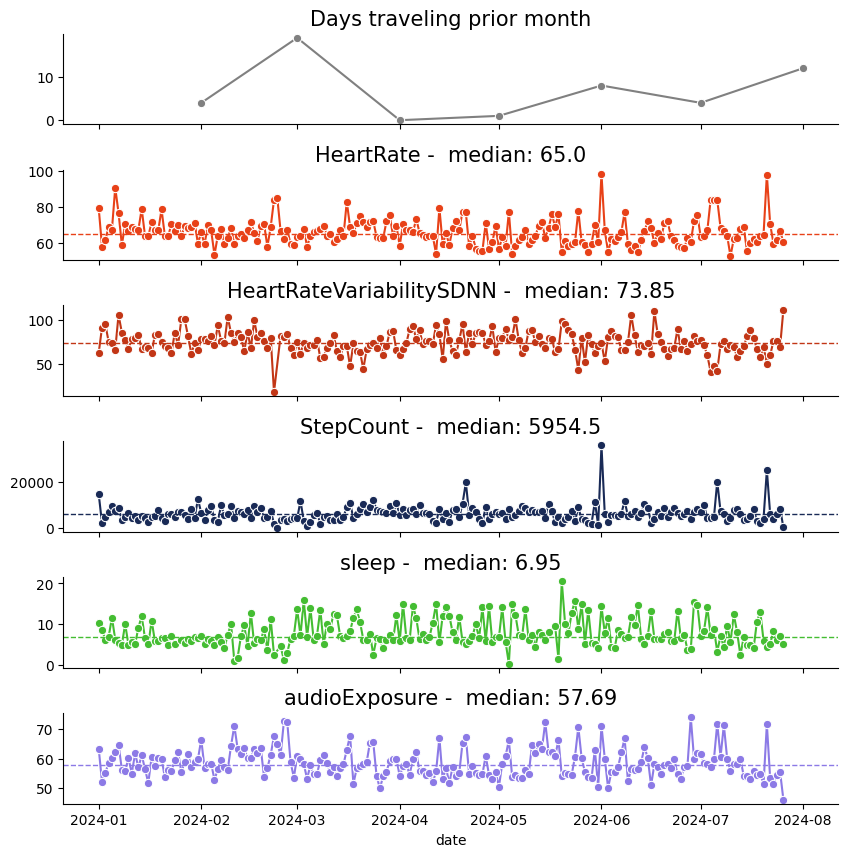

In [64]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 10), sharex=True)

example_features_colors = [
    ("HeartRate_median_day", "#e84118"),
    ("HeartRateVariabilitySDNN_mean_day", "#c23616"),
    ("StepCount_sum", "#192a56"),
    ("sleep_sleepDuration_day", "#44bd32"),
    ("audioExposure_mean", "#8c7ae6"),
]
plt.subplots_adjust(hspace=0.5)

sns.lineplot(
    data=outcome_data,
    marker="o",
    x="survey_start",
    y="total_score",
    ax=axes[0],
    color="gray",
)
axes[0].set_title("Days traveling prior month", fontsize=15)
axes[0].set_ylabel("")

for i, (feature, color) in enumerate(example_features_colors):
    i = i + 1
    sns.lineplot(
        data=daily_features,
        marker="o",
        x="date",
        y=feature,
        ax=axes[i],
        color=color,
    )
    # horizontal line for the median
    axes[i].axhline(
        daily_features[feature].median(),
        color=color,
        linestyle="--",
        linewidth=1,
        label="median",
    )
    axes[i].set_ylabel("")
    axes[i].set_title(
        f"{feature.split('_')[0]} -  median: {daily_features[feature].median().round(2)}",
        fontsize=15,
    )

sns.despine(fig)

## Longer Aggregations

Typically for an analysis, aggregation of features occurs on timespans longer or even shorter than a day. the `simple_features_daily` module is a wrapper around `simple_features` that makes it daily. But the core features can opperate on different timescales. 


In the following example I'm creating a fake "outcomes" data. We'll assume its collected every month and asks participants to tell us about their last month.

In this example we use the function `generateHKFeatures` it is another wrapper around `simple_features` and other feature generation functions like `timedomain_features`. I recommend using `generateHKFeatures` as a template and customizing its code to fit a specific analysis.

In [ ]:
# Example outcome data, imagine substituting for a PHQ-9 score
outcome_data = pd.DataFrame(
    {
        "survey_start": [
            "2024-02-01",
            "2024-03-01",
            "2024-04-01",
            "2024-05-01",
            "2024-06-01",
            "2024-07-01",
            "2024-08-01",
        ],
        "duration": ["30D"] * 7,
        "total_score": [
            4,
            19,
            0,
            1,
            8,
            4,
            12,
        ],  # days I spent traveling/not-home
    }
)
outcome_data["survey_start"] = pd.to_datetime(outcome_data["survey_start"])
outcome_data

,survey_start,duration,total_score
0,2024-02-01,30D,4
1,2024-03-01,30D,19
2,2024-04-01,30D,0
3,2024-05-01,30D,1
4,2024-06-01,30D,8
5,2024-07-01,30D,4
6,2024-08-01,30D,12


In [44]:
from mhealth_feature_generation import generate_features as gf

importlib.reload(gf)

# Generate features around outcomedata

outcome_agg_features = [pd.DataFrame()] * len(outcome_data)
for i, row in outcome_data.iterrows():
    outcome_agg_features[i] = gf.generateHKFeatures(
        user_hk=recent_hk_data,
        user_id="anon",
        timestamp=row["survey_start"],
        duration=row["duration"],
    )

outcome_features_df = pd.concat(outcome_agg_features)
outcome_with_features = outcome_data.merge(outcome_features_df)
outcome_with_features

,survey_start,duration,total_score,sleep_sleepDuration_day_mean,sleep_sleepDuration_day_median,sleep_sleepDuration_day_min,sleep_sleepDuration_day_max,sleep_sleepDuration_day_std,sleep_bedrestDuration_day_mean,sleep_bedrestDuration_day_median,...,RespiratoryRate_peak_period,RespiratoryRate_max_autocorr_lag,RespiratoryRate_decay_rate,QC_watch_on_percent,QC_watch_on_hours,QC_duration_days,QC_ndates,user_id,QC_expected_duration,QC_expected_duration_days
0,2024-02-01,30D,4,7.421407,6.095139,4.200000,17.132222,3.280343,9.444435,8.215278,...,23.951510,1,1.262933,98.335645,709,30.041667,32,anon,30D,30.0
1,2024-03-01,30D,19,6.723657,6.539861,0.833333,14.716667,3.053317,9.217554,9.121389,...,25.016378,1,1.088233,87.101248,628,30.082338,32,anon,30D,30.0
2,2024-04-01,30D,0,8.123435,6.841667,2.608333,15.125000,3.426031,10.071380,8.698889,...,23.966322,1,1.075027,96.948682,699,30.041667,32,anon,30D,30.0
3,2024-05-01,30D,1,8.651783,6.691944,0.783333,15.071944,3.816609,10.468181,8.966111,...,23.996672,1,1.424513,98.196949,708,30.041667,32,anon,30D,30.0
4,2024-06-01,30D,8,7.955491,7.224306,0.725000,15.258333,4.193633,10.568441,8.439722,...,23.056293,1,1.687704,93.619972,675,30.079861,32,anon,30D,30.0
5,2024-07-01,30D,4,8.636272,7.341389,1.608333,14.725000,3.486390,10.653737,10.130833,...,23.892441,1,24.319152,97.503467,703,30.079375,32,anon,30D,30.0
6,2024-08-01,30D,12,7.146044,7.133333,2.116667,12.766667,2.708308,10.275689,9.647500,...,24.375439,1,1.124208,79.611650,574,24.996146,26,anon,30D,30.0


In [ ]:
# QC on features generated around outcome data
from mhealth_feature_generation import feature_qc

importlib.reload(feature_qc)
qc_data = feature_qc.healthKitQCFillNan(
    outcome_with_features,
    duration_threshold=0.8,  # 80% of the duration should be filled with some data
    watch_on_threshold=0.8,  # 80% of the duration should have watch data (HeartRate)
)
qc_data

Watch on threshold removed 0 rows
Duration threshold removed 0 rows
QC removed 0 rows (0.0%)


,index,survey_start,duration,total_score,sleep_sleepDuration_day_mean,sleep_sleepDuration_day_median,sleep_sleepDuration_day_min,sleep_sleepDuration_day_max,sleep_sleepDuration_day_std,sleep_bedrestDuration_day_mean,...,RespiratoryRate_max_autocorr_lag,RespiratoryRate_decay_rate,QC_watch_on_percent,QC_watch_on_hours,QC_duration_days,QC_ndates,user_id,QC_expected_duration,QC_expected_duration_days,QC_duration_percent
0,0,2024-02-01,30D,4,7.421407,6.095139,4.200000,17.132222,3.280343,9.444435,...,1.0,1.262933,98.335645,709,30.041667,32,anon,30D,30.0,1.001389
1,1,2024-03-01,30D,19,6.723657,6.539861,0.833333,14.716667,3.053317,9.217554,...,1.0,1.088233,87.101248,628,30.082338,32,anon,30D,30.0,1.002745
2,2,2024-04-01,30D,0,8.123435,6.841667,2.608333,15.125000,3.426031,10.071380,...,1.0,1.075027,96.948682,699,30.041667,32,anon,30D,30.0,1.001389
3,3,2024-05-01,30D,1,8.651783,6.691944,0.783333,15.071944,3.816609,10.468181,...,1.0,1.424513,98.196949,708,30.041667,32,anon,30D,30.0,1.001389
4,4,2024-06-01,30D,8,7.955491,7.224306,0.725000,15.258333,4.193633,10.568441,...,1.0,1.687704,93.619972,675,30.079861,32,anon,30D,30.0,1.002662
5,5,2024-07-01,30D,4,8.636272,7.341389,1.608333,14.725000,3.486390,10.653737,...,1.0,24.319152,97.503467,703,30.079375,32,anon,30D,30.0,1.002646
6,6,2024-08-01,30D,12,7.146044,7.133333,2.116667,12.766667,2.708308,10.275689,...,1.0,1.124208,79.611650,574,24.996146,26,anon,30D,30.0,0.833205


In [ ]:
import pingouin as pg

numeric_vals = [
    c
    for c in qc_data.columns
    if c not in ["survey_start", "duration", "user_id", "date", "index"]
    and not c.startswith("QC_")
]

pairwise = pg.pairwise_corr(
    qc_data,
    columns=[["total_score"], [c for c in numeric_vals if c != "total_score"]],
    method="pearson",
    padjust="fdr_bh",
)
"""
corr = qc_data[numeric_vals].corr().dropna(how="all").dropna(axis=1, how="all")
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=False, fmt=".2f", cmap="coolwarm", ax=ax, square=True)
"""
pairwise.sort_values(by="p-unc")

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,BF10,power
79,total_score,BasalEnergyBurned_mean,pearson,two-sided,7,-0.974711,"[-1.0, -0.83]",0.000193,0.024723,fdr_bh,92.562,0.994670
47,total_score,sleep_sleepOnsetHours_day_std,pearson,two-sided,7,0.969339,"[0.8, 1.0]",0.000311,0.024723,fdr_bh,68.182,0.990799
113,total_score,OxygenSaturation_mean,pearson,two-sided,7,-0.956017,"[-0.99, -0.72]",0.000761,0.034082,fdr_bh,38.263,0.976571
43,total_score,sleep_sleepOnsetHours_day_mean,pearson,two-sided,7,-0.947777,"[-0.99, -0.68]",0.001164,0.034082,fdr_bh,28.998,0.964874
73,total_score,sleep_InBed_sum,pearson,two-sided,7,0.945111,"[0.67, 0.99]",0.001316,0.034082,fdr_bh,26.75,0.960683
...,...,...,...,...,...,...,...,...,...,...,...,...
95,total_score,HeartRate_min,pearson,two-sided,7,0.017950,"[-0.75, 0.76]",0.969533,0.994553,fdr_bh,0.457,0.049400
1,total_score,sleep_sleepDuration_day_median,pearson,two-sided,7,-0.008200,"[-0.76, 0.75]",0.986080,0.999240,fdr_bh,0.457,0.049264
40,total_score,sleep_bedrestOffsetHours_day_min,pearson,two-sided,7,-0.005422,"[-0.76, 0.75]",0.990795,0.999240,fdr_bh,0.457,0.049244
119,total_score,OxygenSaturation_kurtosis,pearson,two-sided,7,-0.001929,"[-0.75, 0.75]",0.996726,0.999240,fdr_bh,0.457,0.049231


Text(0.5, 1.0, 'Pearson correlation with days traveling')

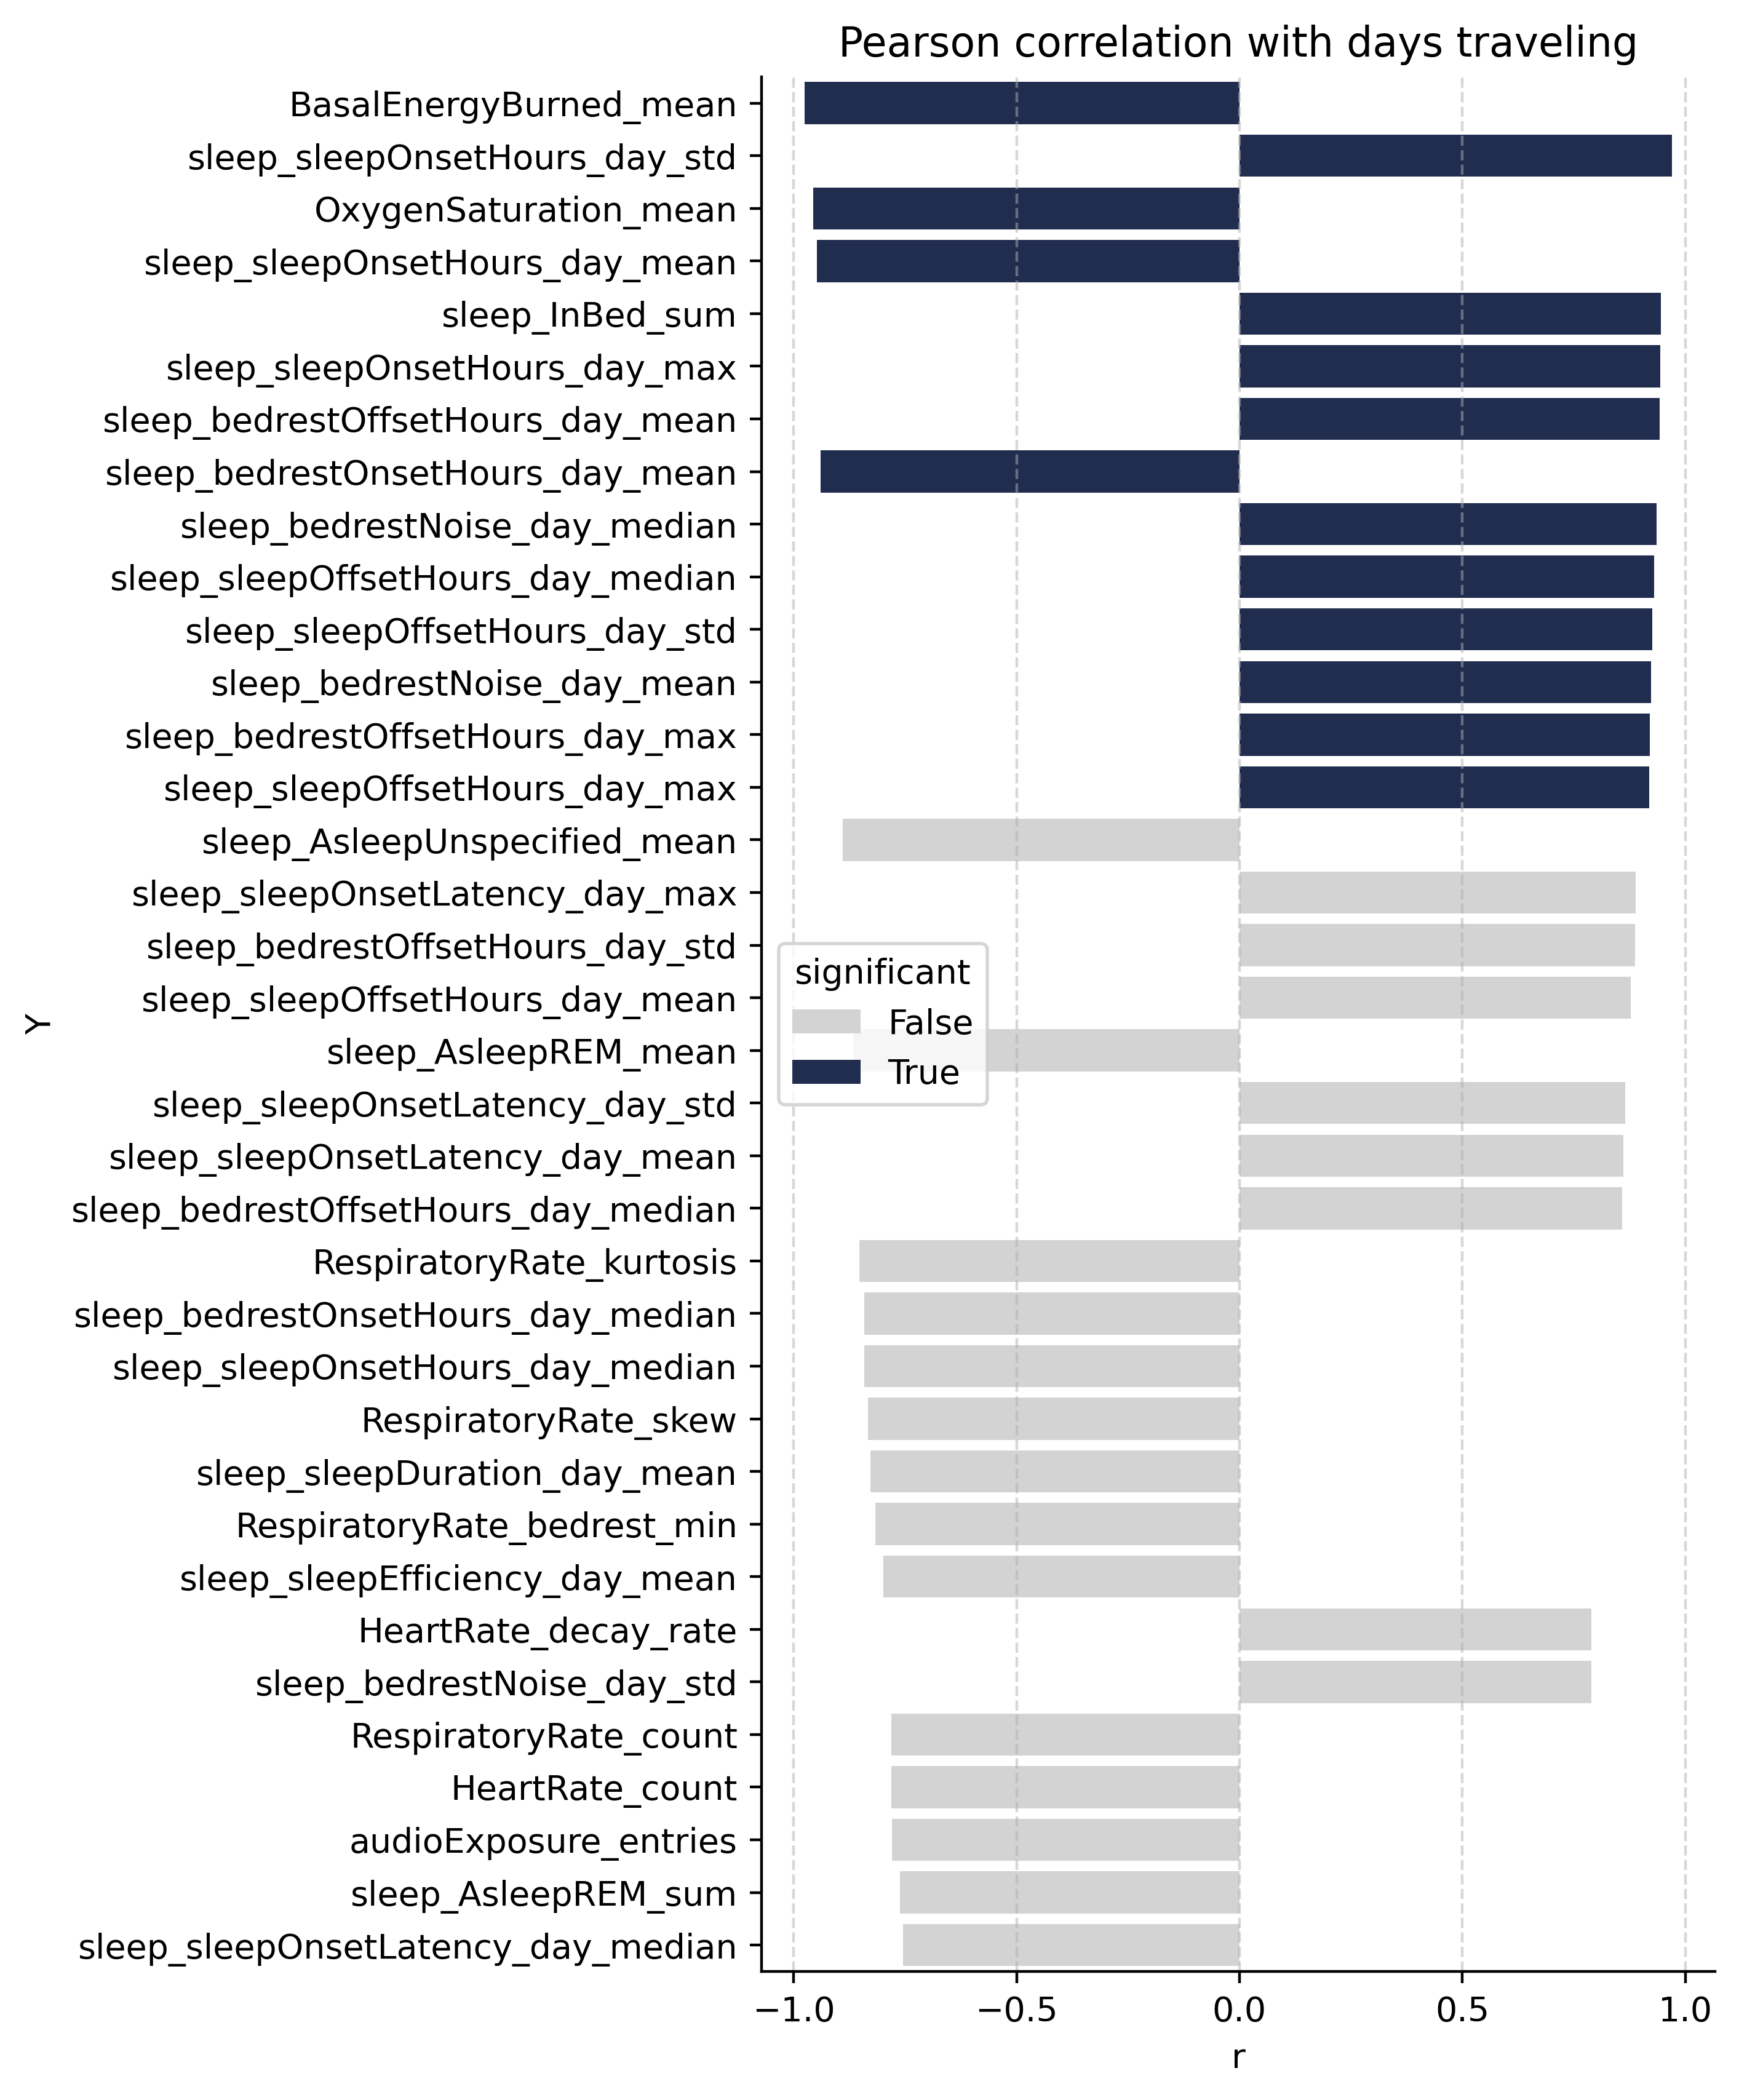

In [ ]:
sig_corr = pairwise[pairwise["p-unc"] < 0.05].sort_values(by="p-unc")
sig_corr["significant"] = sig_corr["p-corr"] < 0.05
fig, ax = plt.subplots(figsize=(5, 10), dpi=400)
sns.barplot(
    data=sig_corr,
    x="r",
    y="Y",
    hue="significant",
    dodge=False,
    ax=ax,
    palette={True: "#192a56", False: "lightgray"},
)
sns.despine(fig)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.grid(axis="x", linestyle="--", alpha=0.5)
ax.set_title("Pearson correlation with days traveling")